In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

# Can we predict the current growth rate based on dates certain measures were taken?

## Data Cleaning

In [3]:
# Note: data downloaded from Yu group Github on 5/7/20
demo = pd.read_csv('data/county_data_abridged.csv')
demo.head()

,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,CensusRegionName,CensusDivisionName,Rural-UrbanContinuumCode2013,PopulationEstimate2018,PopTotalMale2017,PopTotalFemale2017,FracMale2017,PopulationEstimate65+2017,PopulationDensityperSqMile2010,CensusPopulation2010,MedianAge2010,#EligibleforMedicare2018,"MedicareEnrollment,AgedTot2017",3-YrDiabetes2015-17,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,#FTEHospitalTotal2017,"TotalM.D.'s,TotNon-FedandFed2017",#HospParticipatinginNetwork2017,#Hospitals,#ICU_beds,dem_to_rep_ratio,PopMale<52010,PopFmle<52010,PopMale5-92010,PopFmle5-92010,PopMale10-142010,PopFmle10-142010,PopMale15-192010,PopFmle15-192010,PopMale20-242010,PopFmle20-242010,PopMale25-292010,PopFmle25-292010,PopMale30-342010,PopFmle30-342010,PopMale35-442010,PopFmle35-442010,PopMale45-542010,PopFmle45-542010,PopMale55-592010,PopFmle55-592010,PopMale60-642010,PopFmle60-642010,PopMale65-742010,PopFmle65-742010,PopMale75-842010,PopFmle75-842010,PopMale>842010,PopFmle>842010,3-YrMortalityAge<1Year2015-17,3-YrMortalityAge1-4Years2015-17,3-YrMortalityAge5-14Years2015-17,3-YrMortalityAge15-24Years2015-17,3-YrMortalityAge25-34Years2015-17,3-YrMortalityAge35-44Years2015-17,3-YrMortalityAge45-54Years2015-17,3-YrMortalityAge55-64Years2015-17,3-YrMortalityAge65-74Years2015-17,3-YrMortalityAge75-84Years2015-17,3-YrMortalityAge85+Years2015-17,mortality2015-17Estimated,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
0,01001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,-86.494165,South,East South Central,2.0,55601.0,27007.0,28497.0,0.486578,8392.0,91.8,54571.0,37.0,11439.0,8046.0,16.0,9.9,204.5,56.1,18.081557,81.79,324.0,50.0,0.0,1.0,6.0,0.326656,1866.0,1713.0,2001.0,1990.0,2171.0,2119.0,2213.0,2077.0,1539.0,1541.0,1543.0,1614.0,1594.0,1736.0,3978.0,4265.0,4040.0,4165.0,1524.0,1559.0,1279.0,1498.0,1821.0,2192.0,841.0,1141.0,159.0,392.0,NaN,NaN,NaN,NaN,10.0,20.0,44.0,73.0,112.0,143.0,109.0,NaN,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4354,NaN,NaN,NaN
1,01003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,-87.762381,South,East South Central,3.0,218022.0,103225.0,109403.0,0.485472,42413.0,114.7,182265.0,41.1,54145.0,41590.0,33.0,8.5,183.2,41.9,17.489033,54.28,2101.0,536.0,0.0,3.0,51.0,0.253255,5614.0,5544.0,5832.0,5767.0,6076.0,5850.0,5930.0,5670.0,4793.0,4656.0,5183.0,5064.0,5317.0,5392.0,11620.0,11933.0,13047.0,13874.0,5943.0,6580.0,5728.0,6284.0,8558.0,9245.0,4379.0,5153.0,1176.0,2057.0,13.0,NaN,NaN,23.0,30.0,52.0,125.0,262.0,434.0,546.0,597.0,NaN,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.2162,NaN,NaN,NaN
2,01005,1.0,5.0,Barbour,AL,Alabama,31.874030,-85.397327,31.844036,-85.310038,South,East South Central,6.0,24881.0,13335.0,11935.0,0.527701,4757.0,31.0,27457.0,39.0,6681.0,4706.0,NaN,15.7,220.4,49.0,21.999985,69.82,181.0,12.0,0.0,1.0,5.0,0.893106,847.0,855.0,826.0,816.0,820.0,779.0,919.0,812.0,1048.0,746.0,1212.0,798.0,1162.0,646.0,2115.0,1513.0,2164.0,1854.0,910.0,907.0,859.0,940.0,1067.0,1171.0,498.0,730.0,129.0,314.0,NaN,NaN,NaN,NaN,NaN,NaN,21.0,44.0,65.0,72.0,68.0,NaN,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.9959,6.08,5400.0,18241.0
3,01007,1.0,7.0,Bibb,AL,Alabama,32.999024,-87.125260,33.030921,-87.127659,South,East South Central,1.0,22400.0,12138.0,10530.0,0.535469,3632.0,36.8,22915.0,37.8,5128.0,3389.0,NaN,13.3,225.5,57.2,19.114200,84.49,145.0,16.0,0.0,1.0,0.0,0.278124,712.0,666.0,759.0,646.0,771.0,669.0,806.0,737.0,811.0,680.0,987.0,616.0,1013.0,633.0,1895.0,1487.0,1883.0,1503.0,734.0,667.0,684.0,650.0,803.0,920.0,370.0,534.0,73.0,206.0,NaN,NaN,NaN,NaN,NaN,NaN,24.0,37.0,62.0,56.0,45.0,NaN,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.6003,2.75,1498

In [4]:
# Note: data downloaded from CSSE Github on 5/7/20
cases = pd.read_csv('data/time_series_covid19_confirmed_US.csv')
cases.head(10)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,"Guam, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,5,12,14,15,27,29,32,37,45,51,55,56,58,69,77,82,84,93,112,113,121,121,128,130,133,133,133,133,135,135,136,136,136,136,136,136,139,141,141,141,141,141,141,145,145,145,145,145,145,149,149,151,151,151
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6,6,8,8,8,8,8,11,11,11,11,11,11,11,13,13,13,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,15,15,15,16,16
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.220800,-66.590100,"Puerto Rico, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,14,21,23,31,39,51,64,79,100,127,174,239,286,316,316,452,475,513,573,620,683,725,788,897,903,923,974,1043,1068,1118,1213,1252,1298,1252,1416,1276,1307,1371,1389,1400,1433,1539,1575,1757,1808,1843,1924,1968,2031,2156,2173,2198
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.335800,-64.896300,"Virgin Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,6,6,7,17,17,17,19,22,23,30,30,30,30,37,40,42,43,43,45,45,50,51,51,51,51,51,51,51,53,53,53,53,54,54,54,55,57,57,57,57,66,66,66,66,66,66,66,66,68,68,69
5,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,6,6,6,6,6,7,8,10,12,12,12,12,12,12,15,17,19,19,19,23,24,26,26,25,26,28,30,32,33,36,36,37,39,40,43,44,42,45,48,53,53,58,61,67,68,74
6,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,2,2,3,4,4,5,5,10,15,18,19,20,24,28,29,29,38,42,44,56,59,66,71,72,87,91,101,103,109,112,117,123,132,143,147,147,161,168,171,174,174,175,181,187,188,189,196,205,208,216,222
7,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,3,3,4,9,9,10,10,11,12,14,15,18,20,22,28,29,30,32,32,33,35,37,37,39,42,43,45,45,47,47,51,53,58,59
8,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [5]:
demo.shape

(3244, 87)

In [6]:
demo.columns

Index(['countyFIPS', 'STATEFP', 'COUNTYFP', 'CountyName', 'StateName', 'State',
       'lat', 'lon', 'POP_LATITUDE', 'POP_LONGITUDE', 'CensusRegionName',
       'CensusDivisionName', 'Rural-UrbanContinuumCode2013',
       'PopulationEstimate2018', 'PopTotalMale2017', 'PopTotalFemale2017',
       'FracMale2017', 'PopulationEstimate65+2017',
       'PopulationDensityperSqMile2010', 'CensusPopulation2010',
       'MedianAge2010', '#EligibleforMedicare2018',
       'MedicareEnrollment,AgedTot2017', '3-YrDiabetes2015-17',
       'DiabetesPercentage', 'HeartDiseaseMortality', 'StrokeMortality',
       'Smokers_Percentage', 'RespMortalityRate2014', '#FTEHospitalTotal2017',
       'TotalM.D.'s,TotNon-FedandFed2017', '#HospParticipatinginNetwork2017',
       '#Hospitals', '#ICU_beds', 'dem_to_rep_ratio', 'PopMale<52010',
       'PopFmle<52010', 'PopMale5-92010', 'PopFmle5-92010', 'PopMale10-142010',
       'PopFmle10-142010', 'PopMale15-192010', 'PopFmle15-192010',
       'PopMale20-242010', 'P

In [7]:
demo.iloc[:, :14].isna().sum()

countyFIPS                        0
STATEFP                          23
COUNTYFP                         23
CountyName                        0
StateName                         0
State                           169
lat                             169
lon                             169
POP_LATITUDE                     23
POP_LONGITUDE                    23
CensusRegionName                 98
CensusDivisionName               98
Rural-UrbanContinuumCode2013     24
PopulationEstimate2018           23
dtype: int64

In [8]:
cases.iloc[:, :14].isna().sum()

UID                0
iso2               0
iso3               0
code3              0
FIPS              10
Admin2             7
Province_State     0
Country_Region     0
Lat                0
Long_              0
Combined_Key       0
1/22/20            0
1/23/20            0
1/24/20            0
dtype: int64

In [9]:
cases['FIPS'] = cases['FIPS'].fillna(-1).astype(int)

In [10]:
demo['countyFIPS'].str.isnumeric().value_counts()

True     3242
False       2
Name: countyFIPS, dtype: int64

In [11]:
demo.iloc[-2:]

,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,CensusRegionName,CensusDivisionName,Rural-UrbanContinuumCode2013,PopulationEstimate2018,PopTotalMale2017,PopTotalFemale2017,FracMale2017,PopulationEstimate65+2017,PopulationDensityperSqMile2010,CensusPopulation2010,MedianAge2010,#EligibleforMedicare2018,"MedicareEnrollment,AgedTot2017",3-YrDiabetes2015-17,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,#FTEHospitalTotal2017,"TotalM.D.'s,TotNon-FedandFed2017",#HospParticipatinginNetwork2017,#Hospitals,#ICU_beds,dem_to_rep_ratio,PopMale<52010,PopFmle<52010,PopMale5-92010,PopFmle5-92010,PopMale10-142010,PopFmle10-142010,PopMale15-192010,PopFmle15-192010,PopMale20-242010,PopFmle20-242010,PopMale25-292010,PopFmle25-292010,PopMale30-342010,PopFmle30-342010,PopMale35-442010,PopFmle35-442010,PopMale45-542010,PopFmle45-542010,PopMale55-592010,PopFmle55-592010,PopMale60-642010,PopFmle60-642010,PopMale65-742010,PopFmle65-742010,PopMale75-842010,PopFmle75-842010,PopMale>842010,PopFmle>842010,3-YrMortalityAge<1Year2015-17,3-YrMortalityAge1-4Years2015-17,3-YrMortalityAge5-14Years2015-17,3-YrMortalityAge15-24Years2015-17,3-YrMortalityAge25-34Years2015-17,3-YrMortalityAge35-44Years2015-17,3-YrMortalityAge45-54Years2015-17,3-YrMortalityAge55-64Years2015-17,3-YrMortalityAge65-74Years2015-17,3-YrMortalityAge75-84Years2015-17,3-YrMortalityAge85+Years2015-17,mortality2015-17Estimated,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
3242,City1,NaN,NaN,New York City,NY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3243,City2,NaN,NaN,Kansas City,MO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# since there appears to be no info for these 2 rows, we will drop them
demo = demo.iloc[:-2]
demo['countyFIPS'].str.isnumeric().value_counts()

True    3242
Name: countyFIPS, dtype: int64

In [13]:
demo['FIPS'] = demo['countyFIPS'].astype(int)

In [14]:
# now we can merge demo data with ts data on FIPS
cases = cases.merge(demo, on = 'FIPS')

In [15]:
income = pd.read_excel('data/Unemployment.xls', header = 4)
income.head()

,FIPS,State,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2007,Employed_2007,Unemployed_2007,Unemployment_rate_2007,Civilian_labor_force_2008,Employed_2008,Unemployed_2008,Unemployment_rate_2008,Civilian_labor_force_2009,Employed_2009,Unemployed_2009,Unemployment_rate_2009,Civilian_labor_force_2010,Employed_2010,Unemployed_2010,Unemployment_rate_2010,Civilian_labor_force_2011,Employed_2011,Unemployed_2011,Unemployment_rate_2011,Civilian_labor_force_2012,Employed_2012,Unemployed_2012,Unemployment_rate_2012,Civilian_labor_force_2013,Employed_2013,Unemployed_2013,Unemployment_rate_2013,Civilian_labor_force_2014,Employed_2014,Unemployed_2014,Unemployment_rate_2014,Civilian_labor_force_2015,Employed_2015,Unemployed_2015,Unemployment_rate_2015,Civilian_labor_force_2016,Employed_2016,Unemployed_2016,Unemployment_rate_2016,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018
0,0,US,United States,NaN,NaN,NaN,152191093.0,145156134.0,7034959.0,4.6,153761095.0,144860350.0,8900745.0,5.8,153825455.0,139594698.0,14230757.0,9.3,154270732.0,139408204.0,14862528.0,9.63,154606316.0,140765809.0,13840507.0,8.95,155119195.0,142600402.0,12518793.0,8.07,155485692.0,144018151.0,11467541.0,7.38,155957297.0,146338305.0,9618992.0,6.17,156866585.0,148579026.0,8287559.0,5.28,158708795.0,150981151.0,7727644.0,4.87,160273906.0,153293830.0,6980076.0,4.36,161640488.0,155344043.0,6296445.0,3.9,61937.0,NaN
1,1000,AL,Alabama,NaN,NaN,NaN,2175612.0,2089127.0,86485.0,4.0,2176489.0,2053477.0,123012.0,5.7,2162999.0,1924747.0,238252.0,11.0,2196042.0,1964559.0,231483.0,10.50,2202670.0,1990413.0,212257.0,9.60,2176337.0,2003290.0,173047.0,8.00,2174000.0,2017043.0,156957.0,7.20,2160842.0,2014290.0,146552.0,6.80,2158293.0,2026898.0,131395.0,6.10,2177209.0,2049971.0,127238.0,5.80,2178243.0,2081676.0,96567.0,4.40,2198837.0,2112347.0,86490.0,3.9,49881.0,100.0000
2,1001,AL,"Autauga County, AL",2.0,2.0,1.0,24383.0,23577.0,806.0,3.3,24687.0,23420.0,1267.0,5.1,24703.0,22301.0,2402.0,9.7,25713.0,23431.0,2282.0,8.90,25836.0,23677.0,2159.0,8.40,25740.0,23961.0,1779.0,6.90,25810.0,24205.0,1605.0,6.20,25592.0,24097.0,1495.0,5.80,25613.0,24283.0,1330.0,5.20,25966.0,24645.0,1321.0,5.10,25972.0,24958.0,1014.0,3.90,25957.0,25015.0,942.0,3.6,59338.0,118.9591
3,1003,AL,"Baldwin County, AL",3.0,2.0,1.0,82659.0,80099.0,2560.0,3.1,83223.0,79372.0,3851.0,4.6,82451.0,74403.0,8048.0,9.8,83459.0,75120.0,8339.0,10.00,85045.0,77418.0,7627.0,9.00,84414.0,78065.0,6349.0,7.50,85280.0,79626.0,5654.0,6.60,86384.0,81083.0,5301.0,6.10,87741.0,82882.0,4859.0,5.50,90670.0,85839.0,4831.0,5.30,92090.0,88342.0,3748.0,4.10,93849.0,90456.0,3393.0,3.6,57588.0,115.4508
4,1005,AL,"Barbour County, AL",6.0,6.0,0.0,10334.0,9684.0,650.0,6.3,10161.0,9267.0,894.0,8.8,10003.0,8572.0,1431.0,14.3,10221.0,8959.0,1262.0,12.30,9849.0,8712.0,1137.0,11.50,9362.0,8283.0,1079.0,11.50,9099.0,8168.0,931.0,10.20,8845.0,7913.0,932.0,10.50,8613.0,7848.0,765.0,8.90,8417.0,7717.0,700.0,8.30,8317.0,7831.0,486.0,5.80,8373.0,7940.0,433.0,5.2,34382.0,68.9280


In [16]:
income = income[['FIPS', 'Median_Household_Income_2018']]
income['FIPS'] = income['FIPS'].astype(int)
cases = cases.merge(income, on = 'FIPS')

## Predicting number of cases

In [17]:
cases['stay at home'].value_counts(dropna = False)

NaN         489
737514.0    360
737508.0    315
737517.0    258
737507.0    245
737518.0    212
737521.0    184
737510.0    177
737509.0    146
737505.0    124
737512.0    114
737511.0    109
737515.0    109
737519.0     66
737506.0     64
737516.0     63
737503.0     58
737522.0     46
Name: stay at home, dtype: int64

In [18]:
# we set null values for stay at home order dates to the current date (that way time elapsed since order will be 0)
#filtered_cases['stay at home'] = filtered_cases['stay at home'].fillna(737551).astype(int).apply(pd.Timestamp.fromordinal)

In [19]:
measures = ['stay at home', '>50 gatherings', 'public schools', 'restaurant dine-in', 
            'entertainment/gym', 'federal guidelines']
for measure in measures:
    cases[measure] = cases[measure].fillna(737551).astype(int).apply(pd.Timestamp.fromordinal)

In [20]:
cur_date = pd.Timestamp('5/6/20')
for measure in measures:
    cases[f'days since {measure}'] = cases[measure].apply(lambda x : (cur_date - x).days)

In [21]:
cases['days since stay at home'].value_counts()

0     489
37    360
43    315
34    258
44    245
33    212
30    184
41    177
42    146
46    124
39    114
40    109
36    109
32     66
45     64
35     63
48     58
29     46
Name: days since stay at home, dtype: int64

In [22]:
def rmse(pred, real):
    return np.sqrt(np.mean(np.square(pred - real)))

In [23]:
X = cases.loc[:, '4/25/20': '5/5/20']
y = cases.loc[:, '5/6/20']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 99)

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
rmse(lr.predict(X_test), y_test)

17.05967175011844

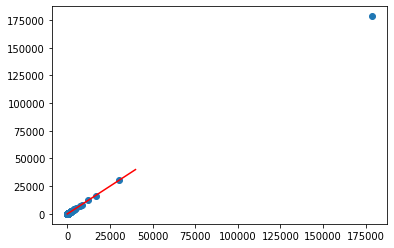

In [27]:
plt.scatter(lr.predict(X_test), y_test)
plt.plot(np.arange(40000), np.arange(40000), color = 'r')

## predict new cases

In [28]:
from sklearn.model_selection import KFold
from sklearn.base import clone
def cross_validate_rmse(model, X, y):
    model = clone(model)
    five_fold = KFold(n_splits=5)
    rmse_values = []
    for tr_ind, va_ind in five_fold.split(X):
        model.fit(X[tr_ind,:], y[tr_ind])
        rmse_values.append(rmse(y[va_ind], model.predict(X[va_ind,:])))
    return np.mean(rmse_values)

In [29]:
def prepare_data(data, pred_date, num_days, extra_features = None):
    
    t = pd.Timestamp(pred_date).strftime('%-m/%-d/%y')
    if t not in data.columns:
        return 'invalid date'
    
    t_1 = pd.Timestamp(pd.Timestamp(pred_date) - pd.DateOffset(1)).strftime('%-m/%-d/%y')
    t_2 = pd.Timestamp(pd.Timestamp(pred_date) - pd.DateOffset(2)).strftime('%-m/%-d/%y')
    t_n = pd.Timestamp(pd.Timestamp(pred_date) - pd.DateOffset(num_days)).strftime('%-m/%-d/%y')
    t_n1 = pd.Timestamp(pd.Timestamp(pred_date) - pd.DateOffset(num_days+1)).strftime('%-m/%-d/%y')
    
    X = np.array(data.loc[:, t_n: t_1]) - np.array(data.loc[:, t_n1: t_2])
    y = np.array(data.loc[:, t]) - np.array(data.loc[:, t_1])
    
    #compute rate
    #X = X / np.array(data.loc[:, t_n1: t_2] + 1e-9)
    #y = y / np.array(data.loc[:, t_1] + 1e-9)
    
    #X[np.array(data.loc[:, t_n1: t_2]) == 0] = 0
    #y[np.array(data.loc[:, t_1]) == 0] = 0
    
    
    if extra_features is not None:
        X = np.hstack((X, np.array(data[extra_features].fillna(0))))
    
    return X, y

In [30]:
X, y = prepare_data(cases, '05/6/20', 5)
X.shape, y.shape

((3139, 5), (3139,))

best rmse: 43.286300659868665
best num days 1


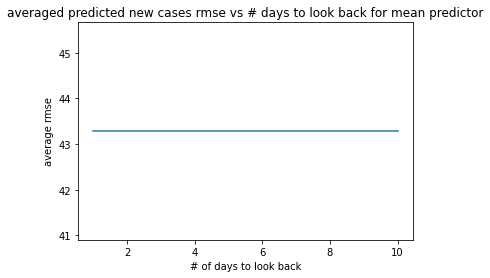

In [31]:
from sklearn.dummy import DummyRegressor
mean_pred = DummyRegressor()
cv_rmses = []
for num_days in np.arange(1, 11, 1):
    cur_rmse = 0
    for pred_date in ['3/1/20', '3/15/20', '4/1/20', '4/15/20', '5/1/20']:
        X, y = prepare_data(cases, pred_date, num_days)
        cur_rmse += cross_validate_rmse(mean_pred, X, y)
    cv_rmses.append(cur_rmse/5)
print('best rmse:', np.min(cv_rmses))
print('best num days', np.argmin(cv_rmses)+1)

plt.plot(np.arange(1, 11, 1), cv_rmses)
plt.title('averaged predicted new cases rmse vs # days to look back for mean predictor')
plt.xlabel('# of days to look back')
plt.ylabel('average rmse');

best rmse: 16.565744925154878
best num days 4


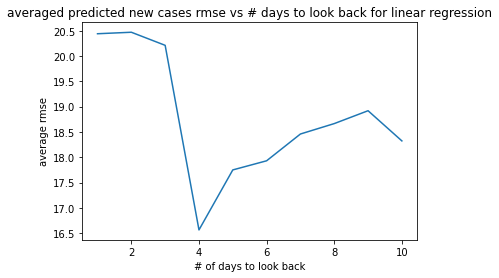

In [32]:
# cross validate num days on a couple different pred dates
cv_rmses = []
for num_days in np.arange(1, 11, 1):
    cur_rmse = 0
    for pred_date in ['3/1/20', '3/15/20', '4/1/20', '4/15/20', '5/1/20']:
        X, y = prepare_data(cases, pred_date, num_days)
        cur_rmse += cross_validate_rmse(lr, X, y)
    cv_rmses.append(cur_rmse/5)
print('best rmse:', np.min(cv_rmses))
print('best num days', np.argmin(cv_rmses)+1)

plt.plot(np.arange(1, 11, 1), cv_rmses)
plt.title('averaged predicted new cases rmse vs # days to look back for linear regression')
plt.xlabel('# of days to look back')
plt.ylabel('average rmse');

best rmse: 28.057853860520908
best num days 4


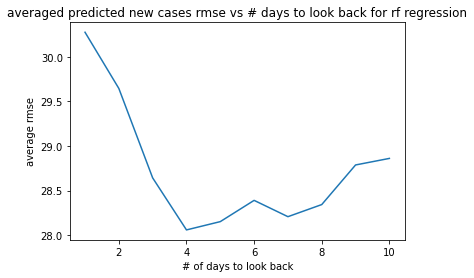

In [33]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
cv_rmses = []
for num_days in np.arange(1, 11, 1):
    cur_rmse = 0
    for pred_date in ['3/1/20', '3/15/20', '4/1/20', '4/15/20', '5/1/20']:
        X, y = prepare_data(cases, pred_date, num_days)
        cur_rmse += cross_validate_rmse(rf, X, y)
    cv_rmses.append(cur_rmse/5)
print('best rmse:', np.min(cv_rmses))
print('best num days', np.argmin(cv_rmses)+1)

plt.plot(np.arange(1, 11, 1), cv_rmses)
plt.title('averaged predicted new cases rmse vs # days to look back for rf regression')
plt.xlabel('# of days to look back')
plt.ylabel('average rmse');

best rmse: 16.554040202295806
best feature MedianAge2010


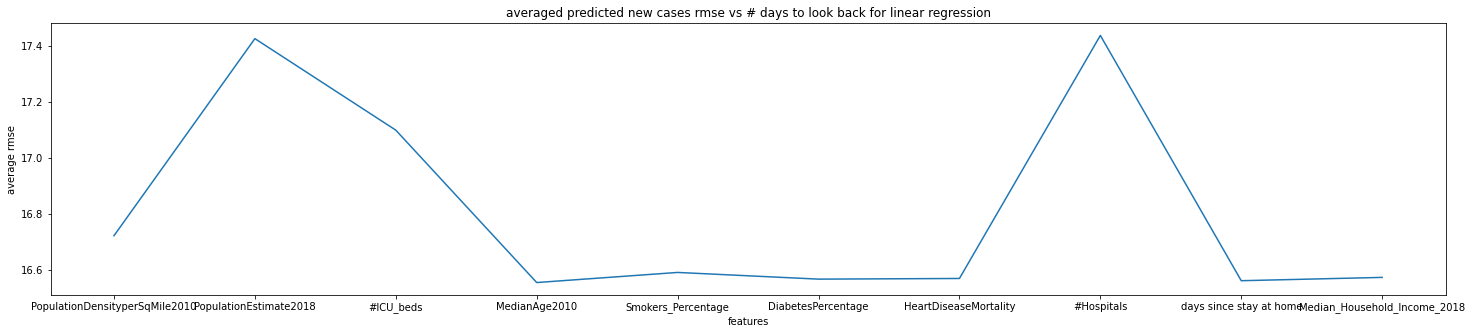

In [34]:
lr = LinearRegression(normalize = True)
cv_rmses = []
features = ['PopulationDensityperSqMile2010',
            'PopulationEstimate2018',
            '#ICU_beds',
            'MedianAge2010',
            'Smokers_Percentage',
            'DiabetesPercentage',
            'HeartDiseaseMortality',
            '#Hospitals',
            'days since stay at home',
            'Median_Household_Income_2018']
for feature in features:
    cur_rmse = 0
    for pred_date in ['3/1/20', '3/15/20', '4/1/20', '4/15/20', '5/1/20']:
        X, y = prepare_data(cases, pred_date, 4, [feature])
        cur_rmse += cross_validate_rmse(lr, X, y)
    cv_rmses.append(cur_rmse/5)
print('best rmse:', np.min(cv_rmses))
print('best feature', features[np.argmin(cv_rmses)])

plt.figure(figsize = (25, 5))
plt.plot(cv_rmses)
plt.title('averaged predicted new cases rmse vs # days to look back for linear regression')
plt.xlabel('features')
plt.xticks(ticks = range(len(features)), labels = features)
plt.ylabel('average rmse');

best rmse: 27.963705137856486
best feature days since stay at home
CPU times: user 1min 43s, sys: 1.64 s, total: 1min 45s
Wall time: 1min 48s


Text(0, 0.5, 'average rmse')

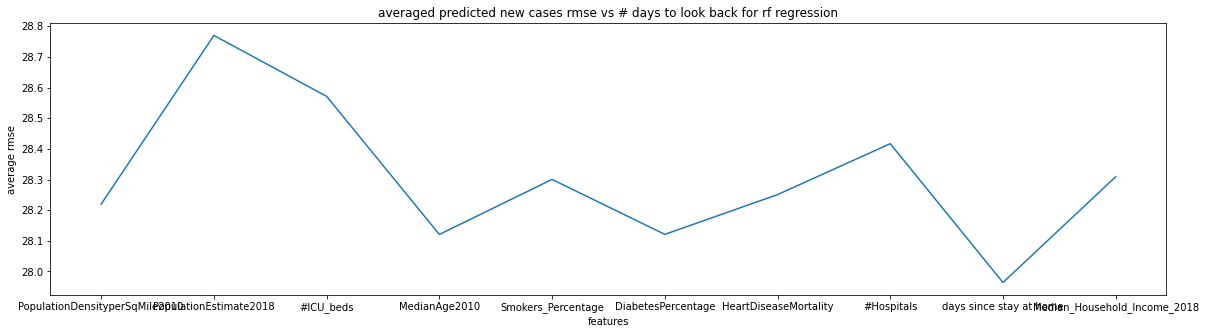

In [35]:
%%time
cv_rmses = []
for feature in features:
    cur_rmse = 0
    for pred_date in ['3/1/20', '3/15/20', '4/1/20', '4/15/20', '5/1/20']:
        X, y = prepare_data(cases, pred_date, 4, [feature])
        cur_rmse += cross_validate_rmse(rf, X, y)
    cv_rmses.append(cur_rmse/5)
print('best rmse:', np.min(cv_rmses))
print('best feature', features[np.argmin(cv_rmses)])

plt.figure(figsize = (20, 5))
plt.plot(cv_rmses)
plt.title('averaged predicted new cases rmse vs # days to look back for rf regression')
plt.xlabel('features')
plt.xticks(ticks = range(len(features)), labels = features)
plt.ylabel('average rmse');

best rmse: 16.554040202295806
best feature MedianAge2010


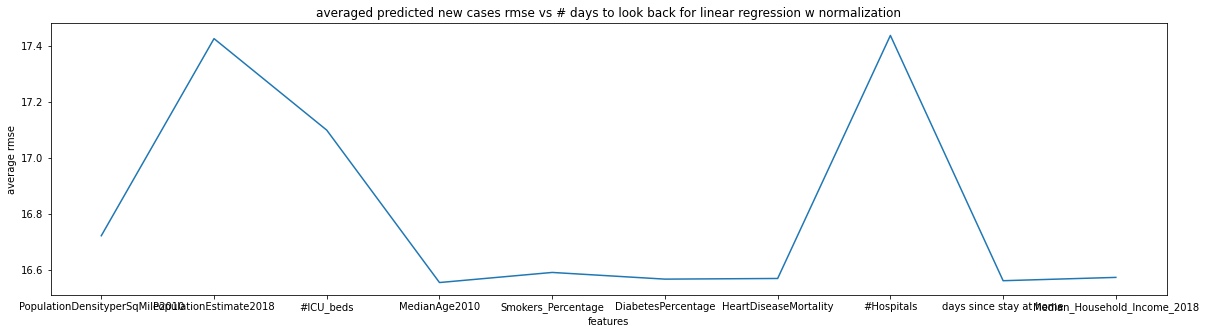

In [36]:
lr = LinearRegression(normalize = True)
cv_rmses = []
for feature in features:
    cur_rmse = 0
    for pred_date in ['3/1/20', '3/15/20', '4/1/20', '4/15/20', '5/1/20']:
        X, y = prepare_data(cases, pred_date, 4, [feature])
        cur_rmse += cross_validate_rmse(lr, X, y)
    cv_rmses.append(cur_rmse/5)
print('best rmse:', np.min(cv_rmses))
print('best feature', features[np.argmin(cv_rmses)])

plt.figure(figsize = (20, 5))
plt.plot(cv_rmses)
plt.title('averaged predicted new cases rmse vs # days to look back for linear regression w normalization')
plt.xlabel('features')
plt.xticks(ticks = range(len(features)), labels = features)
plt.ylabel('average rmse');

In [37]:
best_features = []
cur_rmse = 0
for pred_date in ['3/1/20', '3/15/20', '4/1/20', '4/15/20', '5/1/20']:
    X, y = prepare_data(cases, pred_date, 4, best_features)
    cur_rmse += cross_validate_rmse(lr, X, y)
print('rmse for selcted features:', cur_rmse/5)

rmse for selcted features: 16.565744925154906


In [38]:
best_features = ['MedianAge2010', 'Long_']
cur_rmse = 0
for pred_date in ['3/1/20', '3/15/20', '4/1/20', '4/15/20', '5/1/20']:
    X, y = prepare_data(cases, pred_date, 4, best_features)
    cur_rmse += cross_validate_rmse(lr, X, y)
print('rmse for selcted features:', cur_rmse/5)

rmse for selcted features: 16.539734623191354


In [39]:
best_features = ['PopulationDensityperSqMile2010', 'MedianAge2010', 'Smokers_Percentage', 
                 'DiabetesPercentage', 'HeartDiseaseMortality']
cur_rmse = 0
for pred_date in ['3/1/20', '3/15/20', '4/1/20', '4/15/20', '5/1/20']:
    X, y = prepare_data(cases, pred_date, 4, best_features)
    cur_rmse += cross_validate_rmse(rf, X, y)
print('rmse for selcted features rf:', cur_rmse/5)

rmse for selcted features rf: 28.135874971812058


In [40]:
best_features = ['PopulationDensityperSqMile2010', 'MedianAge2010', 'Smokers_Percentage', 'days since stay at home',
                 'DiabetesPercentage', 'HeartDiseaseMortality', 'Median_Household_Income_2018']
cur_rmse = 0
for pred_date in ['3/1/20', '3/15/20', '4/1/20', '4/15/20', '5/1/20']:
    X, y = prepare_data(cases, pred_date, 0, best_features)
    cur_rmse += cross_validate_rmse(rf, X, y)
print('rmse for selcted features rf:', cur_rmse/5)

rmse for selcted features rf: 43.809153166646446


### bias from counties with large number of cases?

In [41]:
cases['5/6/20'].describe()

count      3139.000000
mean        388.039822
std        3690.655132
min           0.000000
25%           4.000000
50%          21.000000
75%          98.000000
max      178351.000000
Name: 5/6/20, dtype: float64

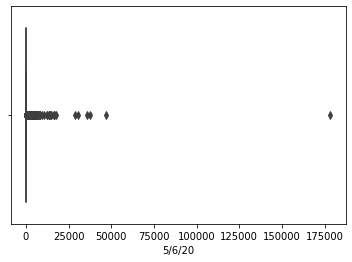

In [42]:
sns.boxplot(cases['5/6/20'])

In [43]:
X, y = prepare_data(cases, '5/6/20', 4)
cur_rmse = cross_validate_rmse(lr, X, y)
print('cv rmse for all counties:', cur_rmse)

cv rmse for all counties: 14.663801670059874


In [44]:
X, y = prepare_data(cases[cases['5/6/20'] < 25000], '5/6/20', 4)
cur_rmse = cross_validate_rmse(lr, X, y)
print('cv rmse for counties with cases < 25000:', cur_rmse)

cv rmse for counties with cases < 25000: 14.750145937717202


In [45]:
X, y = prepare_data(cases[cases['5/6/20'] < 1000], '5/6/20', 4)
cur_rmse = cross_validate_rmse(lr, X, y)
print('cv rmse for counties with cases < 1000:', cur_rmse)

cv rmse for counties with cases < 1000: 5.988775975531885


In [46]:
X, y = prepare_data(cases[(cases['5/6/20'] < 1000) & cases['5/6/20'] > 0], '5/6/20', 4)
cur_rmse = cross_validate_rmse(lr, X, y)
print('cv rmse for counties with cases 0 < x < 1000:', cur_rmse)

cv rmse for counties with cases 0 < x < 1000: 6.978867624024462


In [47]:
X, y = prepare_data(cases, '5/6/20', 4)
pd.Series(y).describe()

count    3139.000000
mean        8.009239
std        48.188500
min        -9.000000
25%         0.000000
50%         0.000000
75%         2.000000
max      1477.000000
dtype: float64

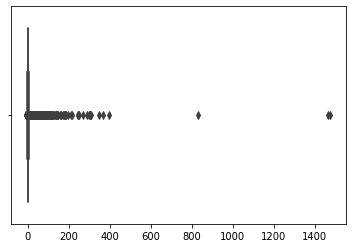

In [48]:
sns.boxplot(y)